# Graph with Networkx : generate new graph from coordinates (Part 2)

This notebook corresponds to the part 2 of the exploration of Networkx package. The part 1 is in **Delaunay_networkx.ipynb** script.

Add colormap on graph : https://stackoverflow.com/questions/26739248/how-to-add-a-simple-colorbar-to-a-network-graph-plot-in-python

# 1. Import packages and data

pip install --upgrade networkx[default]

pip install opencv-python

pip install libpysal

pip install contextily

pip install shapely 

pip install geopandas 

In [ ]:
import os
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import cv2

# Delaunay and Voronoï
import libpysal
from libpysal import weights, examples
from libpysal.cg import voronoi_frames
from contextily import add_basemap

# for the network
import networkx as nx

Nuclei coordinates :

In [4]:
input_coordinates = "./../output_coords"

In [5]:
with open(f"{input_coordinates}/nucleus_coords_A1_wo_background.json", 'r') as file:
    nuclei_coords_A1 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_B2_wo_background.json", 'r') as file:
    nuclei_coords_B2 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_C3_wo_background.json", 'r') as file:
    nuclei_coords_C3 = json.load(file)
with open(f"{input_coordinates}/nucleus_coords_D4_wo_background.json", 'r') as file:
    nuclei_coords_D4 = json.load(file)

Images :

In [6]:
input_images = "./../input_images"

In [7]:
img_A1 = cv2.imread(f'{input_images}/PDAC_12747476B_A1.jpg')
img_B2 = cv2.imread(f'{input_images}/PDAC_ILS50185PT2_B2.jpg')
img_C3 = cv2.imread(f'{input_images}/PanCN_AVD_79MZ_0594_C3.jpg')
img_D4 = cv2.imread(f'{input_images}/PanCN_AVD_61VQ_0158_D4.jpg')

In [8]:
image_name_A1 = "A1"
image_name_B2 = "B2"
image_name_C3 = "C3"
image_name_D4 = "D4"

Output files :

In [13]:
# Output files for graph
output_graph_workspace = "./../delaunay_graphs"
os.makedirs(output_graph_workspace, exist_ok=True)
output_graph_sb =  "/sbgenomics/output-files/data/delaunay_graphs"
os.makedirs(output_graph_sb, exist_ok=True)

# Output files for images
output_image_workspace = "./../output_images/cluster_by_degree_graph"
os.makedirs(output_image_workspace, exist_ok=True)
output_image_sb =  "/sbgenomics/output-files/data/cluster_by_degree_graph"
os.makedirs(output_image_sb, exist_ok=True)

# 2. Fonctions definition

In [9]:
def delaunay_voronoi(nuclei_coordinates):
    """ Perform Delaunay triangulation and create Voronoï diagram
    
    Parameters
    ----------
    nuclei_coordinates : list
        list of center nuclei coordinates
            
    Returns
    ----------
    delaunay_graph : Networkx graph
        delaunay graph
    pos : dict
        dict of graph nodes and coordinates
    """
    cells, generators = voronoi_frames(nuclei_coordinates, clip="convex hull")
    delaunay = weights.Rook.from_dataframe(cells)
    delaunay_graph = delaunay.to_networkx()
    pos = dict(zip(delaunay_graph.nodes, nuclei_coordinates))
    return delaunay_graph, pos

In [8]:
def color_node_by_degree(graph, pos, img, image_name, output_image_sb, output_image_workspace):
    """Color node by degree
    
    Parameters
    ----------
    graph :  Networkx graph
         graph to analyze
    pos : dict
        dict of graph nodes and coordinates
    img : array of image
        image to analyze
    image_name : string
        image name
    output_image_sb : string
        path for saving output in seven bridges
    output_image_workspace : string
        path for saving output in workspace
    """    
    nodes = graph.nodes # get nodes
    degree = graph.degree() # get degree of each node
    n_color = np.asarray([degree[node] for node in nodes]) # degree value for colormap
    vmin = min(n_color) # min degree value
    vmax = max(n_color) # max degree value
    
    fig, ax = plt.subplots()
    figsize = fig.get_size_inches() # get the current size of the figure in inches
    # construct graph
    sc =nx.draw(
        graph, pos = pos, with_labels = False,
        node_size = n_color, 
        vmin = vmin,
        vmax = vmax,
        node_color = n_color,
        cmap = "spring",
        ax = ax
    )
    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.spring, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    plt.colorbar(sm)
    fig.set_size_inches(figsize * 3) # size of the figure for visualization
    plt.imshow(img)
    
    # save results
    fig.savefig(f"{output_image_workspace}/{image_name}_cluster_by_degree.jpg", bbox_inches = "tight")
    fig.savefig(f"{output_image_sb}/{image_name}cluster_by_degree.jpg", bbox_inches = "tight")

# 3. Delaunay and Voronoï data

## 3.1. Delaunay and Voronoï

For more details, check **Delaunay_networkx.ipynb** notebook

A1 :

In [15]:
delaunay_graph_A1, pos_A1 = delaunay_voronoi(nuclei_coords_A1)

/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_ge

In [17]:
# save graph
nx.write_gexf(delaunay_graph_A1, f"{output_graph_workspace}/delaunay_graph_A1.gexf")
nx.write_gexf(delaunay_graph_A1, f"{output_graph_sb}/delaunay_graph_A1.gexf")

B2 :

In [18]:
delaunay_graph_B2, pos_B2 =  delaunay_voronoi(nuclei_coords_B2)

/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_ge

In [19]:
# save graph
nx.write_gexf(delaunay_graph_B2, f"{output_graph_workspace}/delaunay_graph_B2.gexf")
nx.write_gexf(delaunay_graph_B2, f"{output_graph_sb}/delaunay_graph_B2.gexf")

C3 :

In [20]:
delaunay_graph_C3, pos_C3 =  delaunay_voronoi(nuclei_coords_C3)

/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_ge

In [21]:
# save graph
nx.write_gexf(delaunay_graph_C3, f"{output_graph_workspace}/delaunay_graph_C3.gexf")
nx.write_gexf(delaunay_graph_C3, f"{output_graph_sb}/delaunay_graph_C3.gexf")

D4 :

In [22]:
delaunay_graph_D4, pos_D4 =  delaunay_voronoi(nuclei_coords_D4)

/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
/opt/conda/lib/python3.9/site-packages/libpysal/cg/voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_ge

In [23]:
# save graph
nx.write_gexf(delaunay_graph_D4, f"{output_graph_workspace}/delaunay_graph_D4.gexf")
nx.write_gexf(delaunay_graph_D4, f"{output_graph_sb}/delaunay_graph_D4.gexf")

## 3.2. Cluster by degree

A1 :

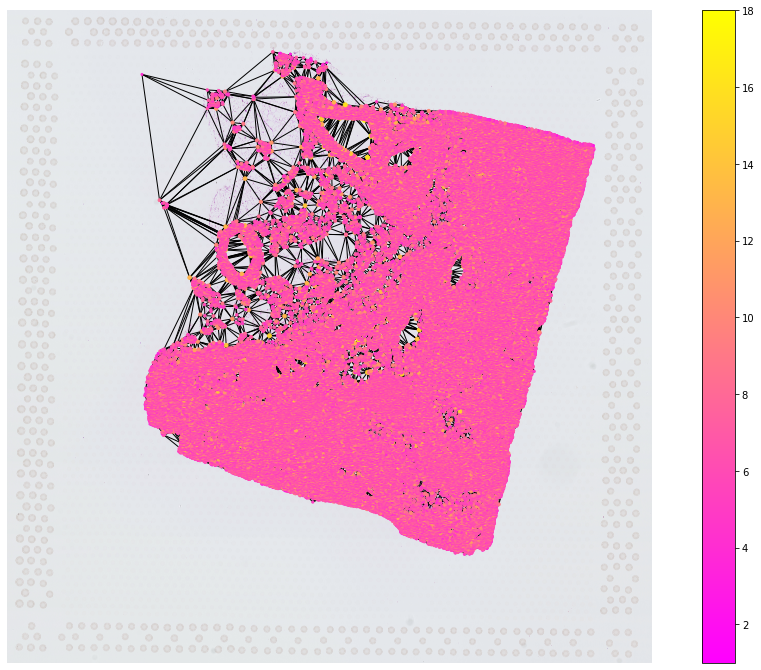

In [12]:
color_node_by_degree(delaunay_graph_A1, pos_A1, img_A1, image_name_A1, output_image_sb, output_image_workspace)

B2 :

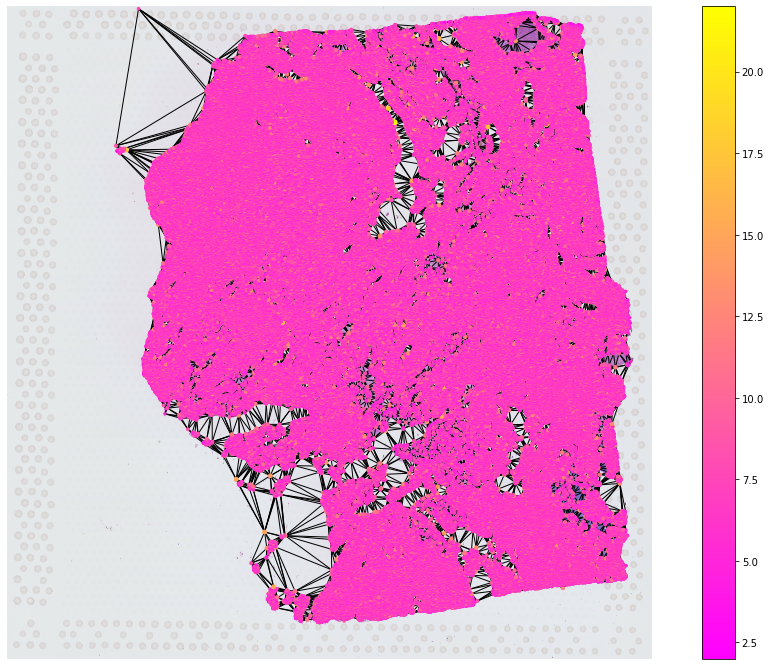

In [15]:
color_node_by_degree(delaunay_graph_B2, pos_B2, img_B2, image_name_B2, output_image_sb, output_image_workspace)

C3 :

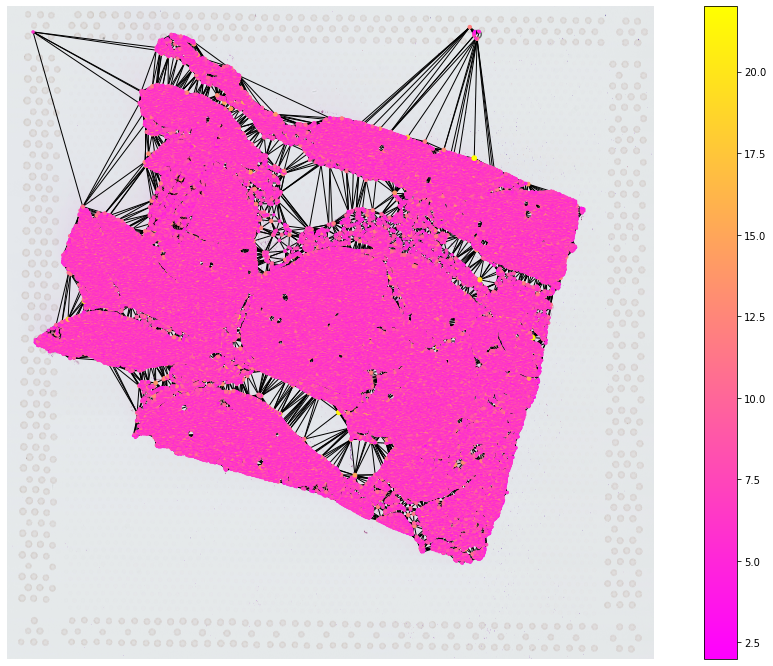

In [18]:
color_node_by_degree(delaunay_graph_C3, pos_C3, img_C3, image_name_C3, output_image_sb, output_image_workspace)

D4 :

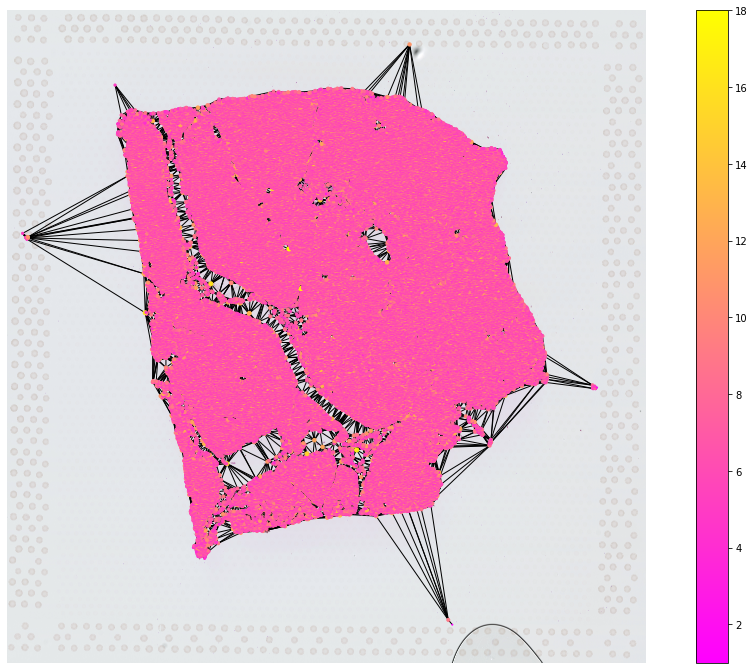

In [19]:
color_node_by_degree(delaunay_graph_D4, pos_D4, img_D4, image_name_D4, output_image_sb, output_image_workspace)

# 2. Geometric edges

In [8]:
g_test = nx.Graph()

In [9]:
positions_test = dict(zip(range(1,135506) , nucleus_coords))

In [10]:
positions_test[1]

[16437, 16914]

In [11]:
g_test.add_nodes_from(positions_test.keys())

In [ ]:
g_test.nodes

In [ ]:
positions_test.keys()

In [14]:
for node_name in g_test.nodes:
    g_test.nodes[node_name]['pos'] = positions_test[node_name]

In [15]:
nx.get_node_attributes(g_test, "pos")

{1: [16437, 16914],
 2: [9736, 16770],
 3: [16566, 16560],
 4: [7725, 16155],
 5: [8229, 16121],
 6: [8263, 16137],
 7: [8166, 16116],
 8: [8209, 16115],
 9: [8190, 16097],
 10: [7614, 16090],
 11: [7695, 16128],
 12: [8281, 16084],
 13: [8271, 16080],
 14: [7954, 16079],
 15: [8072, 16064],
 16: [8111, 16126],
 17: [8087, 16088],
 18: [8958, 16055],
 19: [7564, 16055],
 20: [9871, 16050],
 21: [9625, 16043],
 22: [7890, 16042],
 23: [9867, 16039],
 24: [9750, 16039],
 25: [9761, 16054],
 26: [8214, 16036],
 27: [8858, 16034],
 28: [8642, 16032],
 29: [8785, 16074],
 30: [8784, 16073],
 31: [8783, 16072],
 32: [8767, 16063],
 33: [8705, 16061],
 34: [8704, 16060],
 35: [8703, 16059],
 36: [8753, 16051],
 37: [9857, 16030],
 38: [8224, 16027],
 39: [8237, 16041],
 40: [8229, 16037],
 41: [9257, 16025],
 42: [8690, 16022],
 43: [8702, 16029],
 44: [8705, 16028],
 45: [9217, 16021],
 46: [9222, 16027],
 47: [8717, 16020],
 48: [8738, 16036],
 49: [8453, 16019],
 50: [8964, 16018],
 51: [7

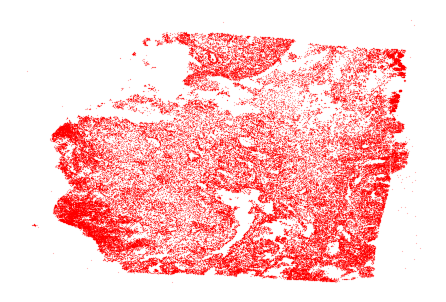

In [16]:
nx.draw(g_test, positions_test, node_size=0.01, node_color = "red", edge_color = "blue")

In [44]:
# remove edges
g_test.remove_edges_from(g_test.edges())

In [45]:
edges_to_add_list = nx.geometric_edges(g_test, 10)
g_test.add_edges_from(edges_to_add_list)

In [ ]:
g_test.edges

In [22]:
g_test.number_of_edges()

897668

In [46]:
g_test.degree

DegreeView({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 2, 30: 2, 31: 2, 32: 0, 33: 2, 34: 2, 35: 2, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 0, 42: 0, 43: 1, 44: 1, 45: 1, 46: 1, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 2, 54: 2, 55: 2, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 2, 64: 1, 65: 1, 66: 0, 67: 0, 68: 0, 69: 1, 70: 1, 71: 0, 72: 0, 73: 0, 74: 0, 75: 1, 76: 1, 77: 0, 78: 1, 79: 0, 80: 1, 81: 2, 82: 1, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 1, 90: 0, 91: 2, 92: 1, 93: 0, 94: 1, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 2, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 1, 115: 0, 116: 0, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 2, 127: 1, 128: 0, 129: 2, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 2, 136: 0, 137: 0, 

In [47]:
dict(g_test.degree())

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 2,
 30: 2,
 31: 2,
 32: 0,
 33: 2,
 34: 2,
 35: 2,
 36: 0,
 37: 0,
 38: 0,
 39: 1,
 40: 1,
 41: 0,
 42: 0,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 2,
 54: 2,
 55: 2,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 2,
 64: 1,
 65: 1,
 66: 0,
 67: 0,
 68: 0,
 69: 1,
 70: 1,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 1,
 76: 1,
 77: 0,
 78: 1,
 79: 0,
 80: 1,
 81: 2,
 82: 1,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 1,
 90: 0,
 91: 2,
 92: 1,
 93: 0,
 94: 1,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 2,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 1,
 115: 0,
 116: 0,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 123: 1,
 

In [48]:
nx.set_node_attributes(g_test, dict(g_test.degree()), 'degree')

In [55]:
nx.get_node_attributes(g_test,'degree')

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 2,
 30: 2,
 31: 2,
 32: 0,
 33: 2,
 34: 2,
 35: 2,
 36: 0,
 37: 0,
 38: 0,
 39: 1,
 40: 1,
 41: 0,
 42: 0,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 2,
 54: 2,
 55: 2,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 2,
 64: 1,
 65: 1,
 66: 0,
 67: 0,
 68: 0,
 69: 1,
 70: 1,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 1,
 76: 1,
 77: 0,
 78: 1,
 79: 0,
 80: 1,
 81: 2,
 82: 1,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 1,
 90: 0,
 91: 2,
 92: 1,
 93: 0,
 94: 1,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 2,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 1,
 115: 0,
 116: 0,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 123: 1,
 